# Part 1: Data preprocessing 

 Dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

## Importing libraries and dataset

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [120]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Data exploration

In [121]:
dataset.shape

(1000, 2)

In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [123]:
dataset.select_dtypes(include='object').columns

Index(['Review'], dtype='object')

In [124]:
len(dataset.select_dtypes(include='object').columns)

1

## Dealing with missing values

In [125]:
dataset.isnull().values.any()

False

## Countplot

<Axes: xlabel='Liked', ylabel='count'>

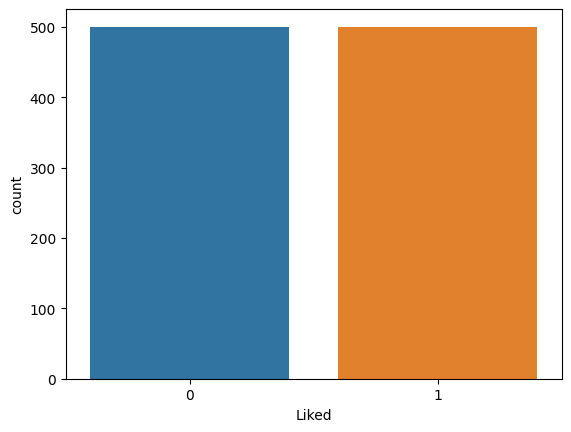

In [126]:
sns.countplot(dataset, x='Liked')

## Length of messages

In [127]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [128]:
dataset['Length'] = dataset['Review'].apply(len)

In [129]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<Axes: ylabel='Frequency'>

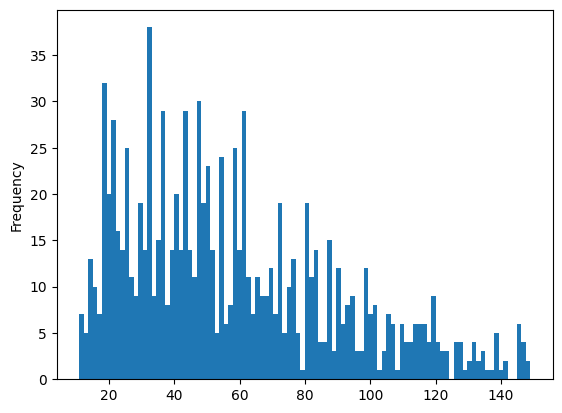

In [130]:
dataset['Length'].plot(bins=100, kind='hist')

## Cleaning the text

In [131]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arsik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
corpus = []
for i in range(dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower().split()
    
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)] 
    review = ' '.join(review)
    corpus.append(review)

corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

## Creating bag of Words Model

In [133]:
from sklearn.feature_extraction.text import CountVectorizer

In [134]:
cv = CountVectorizer(max_features=1500)

In [135]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [136]:
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1]

In [137]:
x.shape

(1000, 1500)

## Splitting dataset

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [139]:
x_train.shape

(800, 1500)

# Part 2: Model building

## Naive Bayes

In [140]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)

GaussianNB()

In [141]:
y_pred = classifier_nb.predict(x_test)

In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [143]:
acc = accuracy_score(y_test,y_pred)
acc

0.685

In [144]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[47, 44],
       [19, 90]], dtype=int64)

## XGBoost Classifier

In [145]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [146]:
y_pred = classifier_xgb.predict(x_test)

In [147]:
acc = accuracy_score(y_test,y_pred)
acc

0.765

In [148]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[80, 11],
       [36, 73]], dtype=int64)

# Final Model

In [149]:
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)
y_pred = classifier_xgb.predict(x_test)
acc = accuracy_score(y_test,y_pred)
acc

0.765

In [180]:
new_review = 'This place is cool and awful and again awful and cool'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_x_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier_nb.predict(new_x_test)
print(new_y_pred)

[1]
